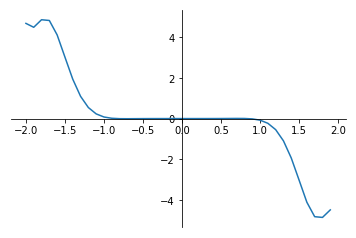

Iteration	 	 a		 	 b		 	 c
0		 -0.10000000	 0.20000000	 0.05000000
1		 -0.10000000	 0.05000000	 -0.02500000
2		 -0.02500000	 0.05000000	 0.01250000
3		 -0.02500000	 0.01250000	 -0.00625000
4		 -0.00625000	 0.01250000	 0.00312500
5		 -0.00625000	 0.00312500	 -0.00156250
6		 -0.00156250	 0.00312500	 0.00078125
7		 -0.00156250	 0.00078125	 -0.00039063
8		 -0.00039063	 0.00078125	 0.00019531
9		 -0.00039063	 0.00019531	 -0.00009766
10		 -0.00009766	 0.00019531	 0.00004883
11		 -0.00009766	 0.00004883	 -0.00002441
12		 -0.00009766	 -0.00002441	 -0.00006104
The root after 12th iteration is: -0.00006104 


In [47]:
# 1.1 Bisection Method
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import math

def func(x):
    #return np.exp(x-2) +x**3-x
    return (2*x*np.cos(x)-2*x) + np.sin(x**3)
def bisection(a,b,tolerance):
    if (func(a) * func(b) >= 0):
        print("You have not assumed right a and b\n")
        return
    
    count = 0
    print ("Iteration\t \t a\t\t \t b\t\t \t c")
    while ((b-a) > tolerance):
    #for i in range(15):
        
        # Find middle point
        c = (a+b)/2
        print ("%d\t\t %.8f\t %.8f\t %.8f" %(count, a ,b ,c))
        # Check if middle point is root
        if (func(c) == 0):
            break

        # Decide the side to repeat the steps
        if (func(c)*func(a) < 0):
            b = c
        else:
            a = c
        count += 1
    print("The root after %dth iteration is: %.8f " %(count, c))

x = np.arange(-2,2,0.1)
y = func(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, y)
plt.show()

a = -0.1
b = 0.2
tolerance = 0.00001
bisection(a, b, tolerance)

In [23]:
# 1.2 Fixed Point Iteration

def func2(x):
    # Question 1
    #return (2*x+2)**(1/3)
    #return np.log(7-x)
    #return np.log(4-np.sin(x))
    
    # Question 3
    #return 3**(1/2)
    #return 5**(1/2)
    
    #Question 5
    #return np.cos(x)**2
    # derivative of cos^2x is -2cos(x)sin(x)
    #return -2*np.cos(x)*np.sin(x) gives us a local convergence where S |g'(r)| < 1
    
    #Question 7
    return 1-5*x+(15)/(2)*x**2-(5)/(2)*x**3

def fpi(x,iteration):
    print("\n i \t \t \t Xi \t \t \t g(Xi)")
    for i in range(iteration):
        print (i, "\t \t %.6f \t" %x, end= " ")
        x = func2(x)
        print("%.6f \t \t " %x)
    root = x
    print("The root after %dth iteration is: " "%.6f" %(i,root))

x = 0.5
iteration = 10

fpi(x, iteration)


 i 	 	 	 Xi 	 	 	 g(Xi)
0 	 	 0.500000 	 0.062500 	 	 
1 	 	 0.062500 	 0.716187 	 	 
2 	 	 0.716187 	 0.347619 	 	 
3 	 	 0.347619 	 0.063182 	 	 
4 	 	 0.063182 	 0.713398 	 	 
5 	 	 0.713398 	 0.342350 	 	 
6 	 	 0.342350 	 0.066965 	 	 
7 	 	 0.066965 	 0.698056 	 	 
8 	 	 0.698056 	 0.313960 	 	 
9 	 	 0.313960 	 0.092113 	 	 
The root after 9th iteration is: 0.092113


In [38]:
from sympy import *

#1.3 Limits of Accuracy

'''Question 1: Let f(x) = sinx -x (a) find the multiplicity of the root r = 0. (b) Using fsolve (python equivalent to fzero in matlb) with initial guess x = 0.1 to locate a root.
   What are the forward and backward errors of fsolve response?'''

equation = "sin(x)-x"
equation2 = "2x*cos(x) -2x + sinx^3"

def func3(x):
    return sin(x) - x

def func4(x):
    return 2*x*cos(x)-2*x + sin(x**3)
    
def calculate_derivative(derivative_times):
    x = symbols('x')
    for i in range (derivative_times):
        deriv_equation = diff(func3(x), x,i+1)     #diff is a function from sympy library that calculate the derivative of an equation
        print((i+1),"Derivative is: " , deriv_equation, "\t", end = " ")
        x_sub = 0
        result = deriv_equation.subs({x:x_sub})
        print("Result when root x = %d is: "%x_sub, result)

calculate_derivative(3)

'''Question 3: Use fzero to find the root of f(x) = 2xcosx-2x+sinx^3 on [-0.1,0.2]. Report the forward and backward errors. (b) Run the bisection Method 
    with initial interval [-0.1, 0.2] to find as many correct digits as possible, and report your conclusion'''

def forward_error(root, approx_root):
    forward_error = abs(root - approx_root)
    print("%s forward error is: " %(equation), forward_error)
    
forward_error(0,-0.000000020735)

def backward_error(approx_root):
    backward_error = abs(func3(approx_root))
    print("%s backward error is: " %(equation), backward_error)

backward_error(-0.000000020735)

back_error = abs(func4(0.000169))
print("%.6f" %back_error)

'''Question 5: Use (1.21) to approximate the root of f(x) = (x-1)(x-2)(x-3)(x-4)-10^-6x^6 near r = 4. Find error magnification factor. 
    Use fzero to check your approximation'''
def g_function(x):
    return x**6

def sensitivity_formula(epsilon,root):
    delta_r = -((epsilon*g_function(root))/(math.factorial(root-1)))
    print("delta_r is: " "%.7f" %delta_r)
    predicted_root = root + delta_r
    print("Predicted root is: " "%.7f" %predicted_root)

sensitivity_formula(-0.000001,4)

def error_mag_factor(root):
    error_magnification_factor = abs(g_function(root))/(abs(root*math.factorial(root-1)))
    print("Error magnification factor is: " "%.7f" %error_magnification_factor)

error_mag_factor(4)

1 Derivative is:  cos(x) - 1 	 Result when root x = 0 is:  0
2 Derivative is:  -sin(x) 	 Result when root x = 0 is:  0
3 Derivative is:  -cos(x) 	 Result when root x = 0 is:  -1
sin(x)-x forward error is:  2.0735e-08
sin(x)-x backward error is:  0
0.000000
delta_r is: 0.0006827
Predicted root is: 4.0006827
Error magnification factor is: 170.6666667


In [49]:
#1.4 Newton's Method

def func5(x):
    return x**3-x**2+2

def derivFunc5(x):
    return 3*x**2-2*x

def newton_method(x):
    iteration = 0
    print("Iteration \t \t xi")
    h = func5(x) / derivFunc5(x)
    while (abs(h) >= 0.0001):
        iteration += 1
        h = func5(x) / derivFunc5(x)
        x = x - h
        print("%d \t \t %.8f" %(iteration,x))
    print("The value of the root is: " "%.8f" %x)

newton_method(-20)

Iteration 	 	 xi
1 	 	 -13.22741935
2 	 	 -8.71612727
3 	 	 -5.71568686
4 	 	 -3.72922796
5 	 	 -2.43255864
6 	 	 -1.62292399
7 	 	 -1.18260326
8 	 	 -1.02218509
9 	 	 -1.00038435
10 	 	 -1.00000012
11 	 	 -1.00000000
The value of the root is: -1.00000000
